Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [27]:
print(os.getcwd())

c:\Users\thana\Desktop\MSRobo_Work\3_fall2023\CS7643 DL\cs7643-project\pytorch-CycleGAN-and-pix2pix


In [4]:
!pip show jupyter

Name: jupyter
Version: 1.0.0
Summary: Jupyter metapackage. Install all the Jupyter components in one go.
Home-page: http://jupyter.org
Author: Jupyter Development Team
Author-email: jupyter@googlegroups.org
License: BSD
Location: C:\Users\thana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages
Requires: ipykernel, ipywidgets, jupyter-console, nbconvert, notebook, qtconsole
Required-by: 


In [5]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\thana\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [8]:
!bash ./datasets/download_cyclegan_dataset.sh horse2zebra

./datasets/download_cyclegan_dataset.sh: line 2: $'\r': command not found
./datasets/download_cyclegan_dataset.sh: line 22: syntax error: unexpected end of file


In [29]:
# Define the directories using raw string literals
gtFine_dir = "./datasets/gtFine_trainvaltest"
leftImg8bit_dir = "./datasets/leftImg8bit"
output_dir = "./datasets/img_cityscape"

# Call the script with the modified paths
!python datasets/prepare_cityscapes_dataset.py --gtFine_dir {gtFine_dir} --leftImg8bit_dir {leftImg8bit_dir} --output_dir {output_dir}



The dataset can be downloaded from https://cityscapes-dataset.com.
Please download the datasets [gtFine_trainvaltest.zip] and [leftImg8bit_trainvaltest.zip] and unzip them.
gtFine contains the semantics segmentations. Use --gtFine_dir to specify the path to the unzipped gtFine_trainvaltest directory. 
leftImg8bit contains the dashcam photographs. Use --leftImg8bit_dir to specify the path to the unzipped leftImg8bit_trainvaltest directory. 
The processed images will be placed at --output_dir.

Example usage:

python prepare_cityscapes_dataset.py --gtFine_dir ./gtFine/ --leftImg8bit_dir ./leftImg8bit --output_dir ./datasets/cityscapes/

Preparing Cityscapes Dataset for val phase
Directory structure prepared at ./datasets/img_cityscape
0 / 500: last image saved at ./datasets/img_cityscape\testB\0_B.jpg, 
50 / 500: last image saved at ./datasets/img_cityscape\testB\50_B.jpg, 
100 / 500: last image saved at ./datasets/img_cityscape\testB\100_B.jpg, 
150 / 500: last image saved at ./dataset

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [21]:
!bash ./scripts/download_cyclegan_model.sh cityscapes

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [cityscapes
]


./scripts/download_cyclegan_model.sh: line 2: $'\r': command not found
./scripts/download_cyclegan_model.sh: line 4: $'\r': command not found
./scripts/download_cyclegan_model.sh: line 6: $'\r': command not found
./scripts/download_cyclegan_model.sh: line 10: $'\r': command not found
for details.

./checkpoints/cityscapes
_pretrained/latest_net_G.pth

: No such file or directory


# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [ ]:
!python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan --display_id -1

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/horse2zebra        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [39]:
!python test.py --dataroot datasets/img_cityscape/testA --name cityscapes_label2photo_pretrained --model test --no_dropout --gpu_ids -1

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/img_cityscape/testA  	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0               

# Visualize

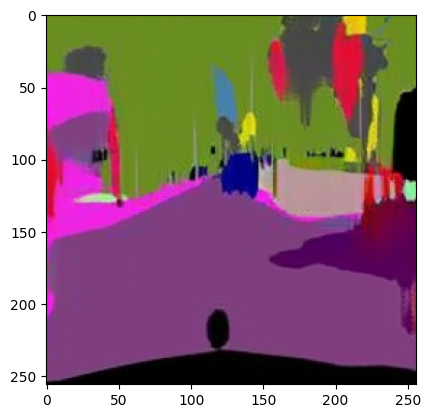

In [36]:
import matplotlib.pyplot as plt

#img = plt.imread('./results/apple2orange_pretrained/test_latest/images/n07740461_10011_fake.png')
img = plt.imread('./results/cityscapes_photo2label_pretrained/test_latest/images/0_A_fake.png')

plt.imshow(img)

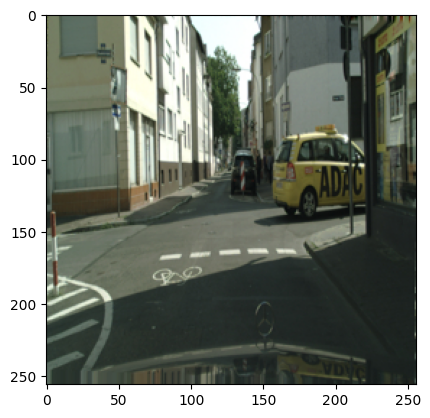

In [38]:
import matplotlib.pyplot as plt

#img = plt.imread('./results/apple2orange_pretrained/test_latest/images/n07740461_10011_real.png')
img = plt.imread('./results/cityscapes_photo2label_pretrained/test_latest/images/0_A_real.png')
plt.imshow(img)